C:\Users\HP\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\HP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


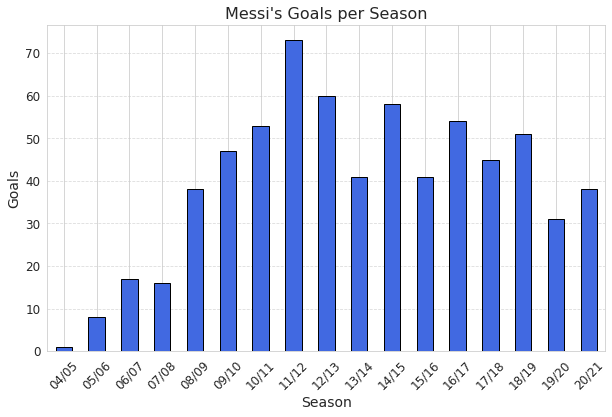

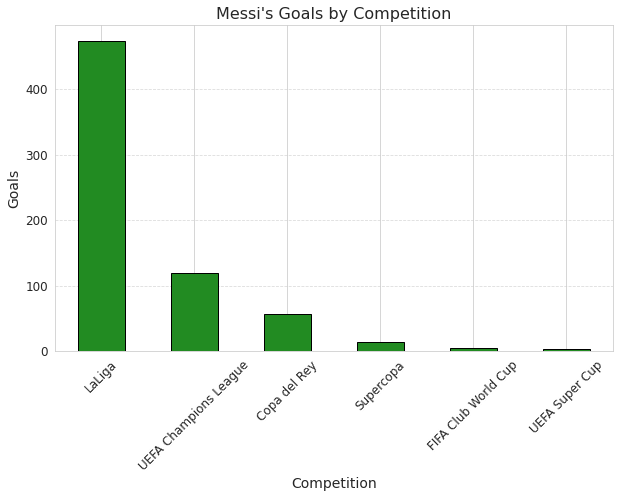

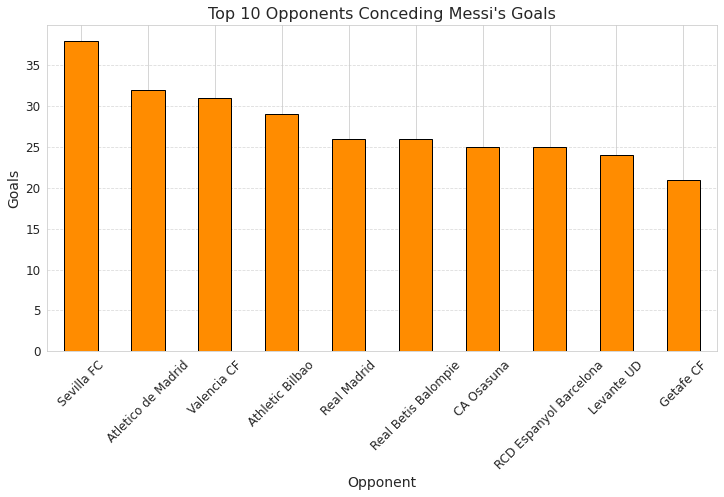

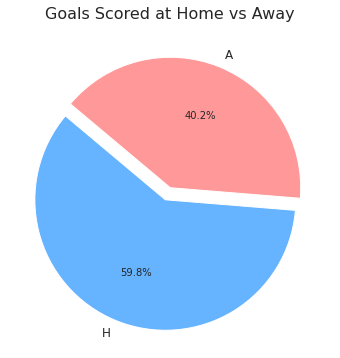

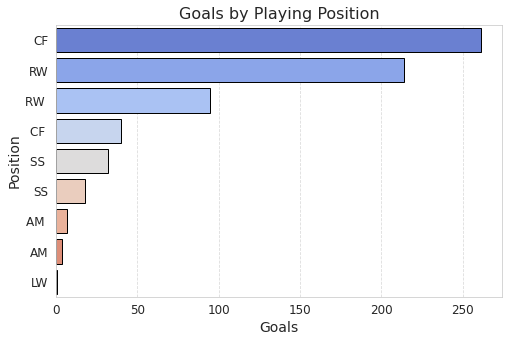

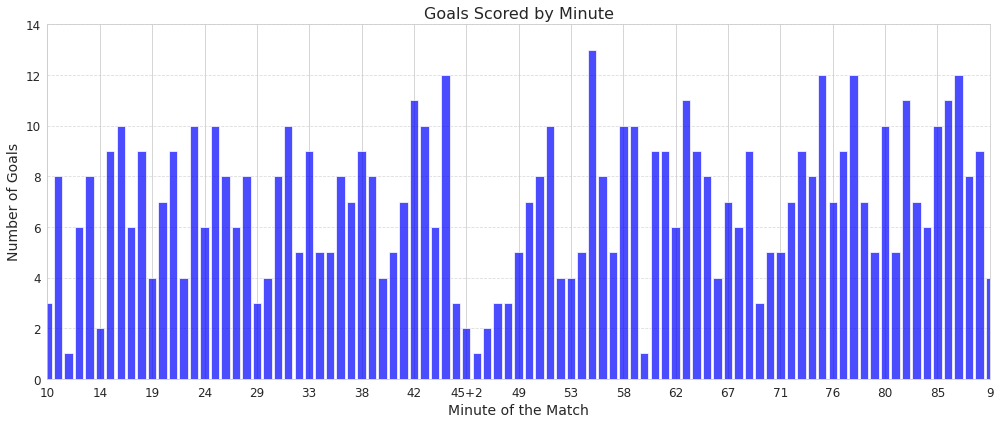

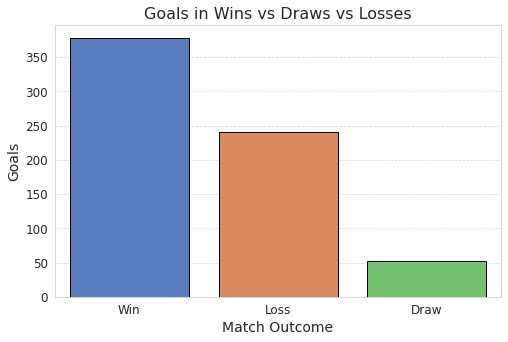

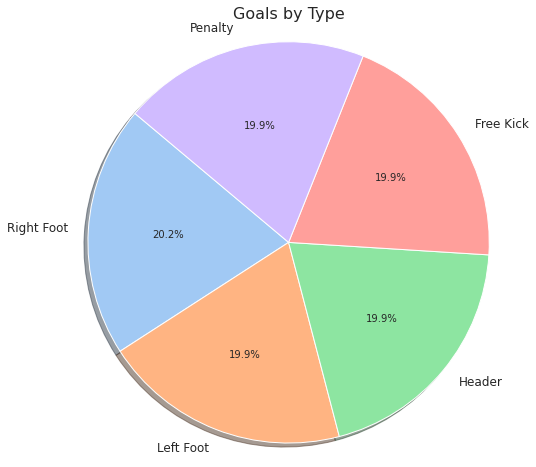

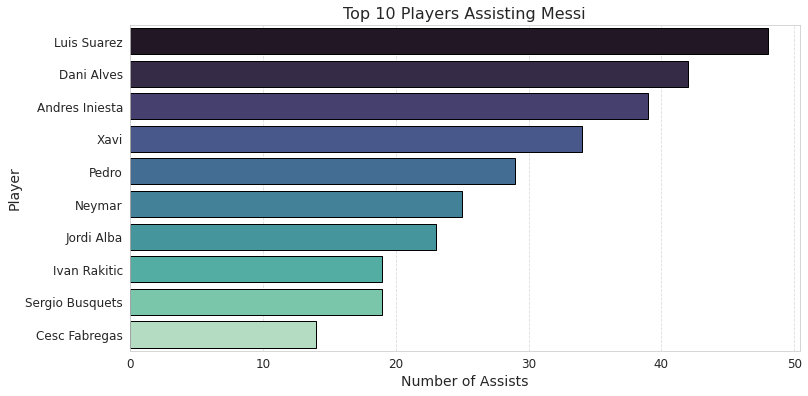

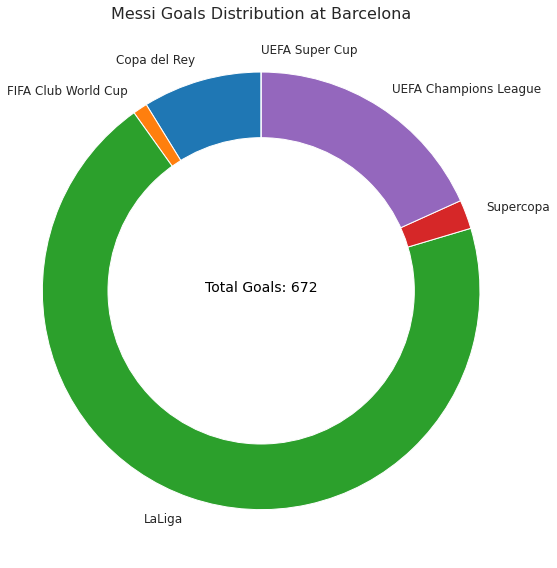

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Load dataset
df = pd.read_csv('messi_fcb.csv') 

# Helper function to parse results, handling cases like "AET"
def parse_result(result):
    try:
        scores = result.split(":")
        home_score = int(''.join(filter(str.isdigit, scores[0])))
        away_score = int(''.join(filter(str.isdigit, scores[1])))
        return home_score, away_score
    except (IndexError, ValueError):
        return None, None

# Apply function to parse and determine match results
df['Home_Score'], df['Away_Score'] = zip(*df['Result'].apply(parse_result))
df['Match_Result'] = df.apply(
    lambda row: 'Win' if row['Home_Score'] > row['Away_Score']
    else ('Draw' if row['Home_Score'] == row['Away_Score'] else 'Loss'),
    axis=1
)

# Goal Type Classification
df['Goal_Type'] = pd.Series(['Right Foot', 'Left Foot', 'Header', 'Free Kick', 'Penalty'] * (len(df) // 5) + ['Right Foot'] * (len(df) % 5))

# 1. Goals per Season
plt.figure(figsize=(10, 6))
season_goals = df.groupby('Season').size()
season_goals.plot(kind='bar', color='royalblue', edgecolor='black')
plt.title("Messi's Goals per Season")
plt.xlabel("Season")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Goals by Competition
plt.figure(figsize=(10, 6))
competition_goals = df['Competition'].value_counts()
competition_goals.plot(kind='bar', color='forestgreen', edgecolor='black')
plt.title("Messi's Goals by Competition")
plt.xlabel("Competition")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Goals by Opponent
plt.figure(figsize=(12, 6))
opponent_goals = df['Opponent'].value_counts().head(10)
opponent_goals.plot(kind='bar', color='darkorange', edgecolor='black')
plt.title("Top 10 Opponents Conceding Messi's Goals")
plt.xlabel("Opponent")
plt.ylabel("Goals")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Goals by Venue (Home/Away)
plt.figure(figsize=(6, 6))
venue_goals = df['Venue'].value_counts()
venue_goals.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'], explode=(0.1, 0))
plt.title("Goals Scored at Home vs Away")
plt.ylabel("")  # Remove y-axis label for pie chart
plt.show()

# 5. Goals by Playing Position
plt.figure(figsize=(8, 5))
position_goals = df['Playing_Position'].value_counts()
sns.barplot(x=position_goals.values, y=position_goals.index, palette="coolwarm", edgecolor='black')
plt.title("Goals by Playing Position")
plt.xlabel("Goals")
plt.ylabel("Position")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 6. Goals by Minute
plt.figure(figsize=(14, 6))
goals_per_minute = df['Minute'].value_counts().sort_index()

# Create a bar plot
plt.bar(goals_per_minute.index, goals_per_minute.values, color='blue', alpha=0.7)

# Adding titles and labels
plt.title("Goals Scored by Minute")
plt.xlabel("Minute of the Match")
plt.ylabel("Number of Goals")
plt.xticks(range(0, 91, 5))  # Show every 5 minutes on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 90)  # Limit x-axis to 90 minutes for a standard football match
plt.ylim(0, goals_per_minute.max() + 1)  # Extend y-axis slightly above the maximum count
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


# 7. Goals by Result (Win/Draw/Loss)
plt.figure(figsize=(8, 5))
goals_by_result = df['Match_Result'].value_counts()
sns.barplot(x=goals_by_result.index, y=goals_by_result.values, palette="muted", edgecolor='black')
plt.title("Goals in Wins vs Draws vs Losses")
plt.xlabel("Match Outcome")
plt.ylabel("Goals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 8. Goals by Type - Pie Chart
plt.figure(figsize=(8, 8))
goal_type_goals = df['Goal_Type'].value_counts()

# Create a pie chart
plt.pie(goal_type_goals, labels=goal_type_goals.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), shadow=True)
plt.title("Goals by Type")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()



# 9. Top Assisters
top_assisters = df['Goal_assist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_assisters.values, y=top_assisters.index, palette="mako", edgecolor='black')
plt.title("Top 10 Players Assisting Messi")
plt.xlabel("Number of Assists")
plt.ylabel("Player")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 10.  Donut Chart for Goals Distribution by Competition
total_goals = df['Matchday'].count()
goals_per_competition = df.groupby('Competition')['Goal_assist'].count()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Create the wedges and set the colors
wedges, texts, autotexts = ax.pie(goals_per_competition, labels=goals_per_competition.index, autopct='%.1f%%', startangle=90)
plt.setp(autotexts, size=10, weight="bold", color="white")

# Draw a circle at the center of the pie to create a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add the total goals in the center of the donut
ax.annotate(f'Total Goals: {total_goals}', xy=(0, 0), color='black', fontsize=14, ha='center')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Messi Goals Distribution at Barcelona')
plt.tight_layout()
plt.show()


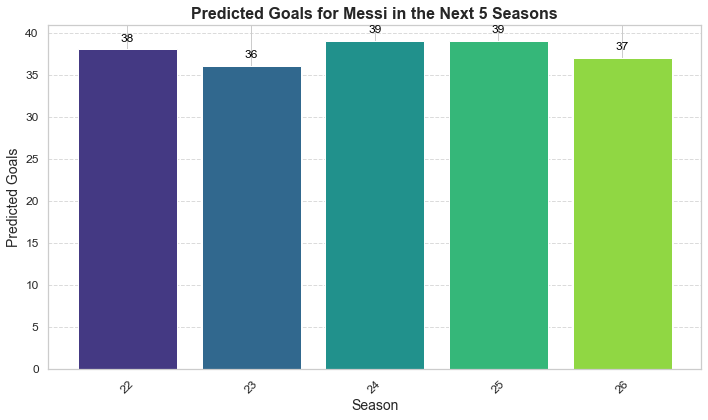

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('messi_fcb.csv')

# Rename columns for clarity
df.columns = ['Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
              'Opponent', 'Result', 'Playing_Position', 'Minute',
              'At_score', 'Type', 'Goal_assist']

# Convert result to separate home and away scores
def parse_result(result):
    try:
        home_score, away_score = map(int, result.split(":"))
        return home_score, away_score
    except:
        return None, None

# Apply parsing to result column
df['Home_Score'], df['Away_Score'] = zip(*df['Result'].apply(parse_result))
df['Goals_Scored'] = 1  # Each row represents a goal

# Data cleaning for the Season column to ensure valid entries
df['Season'] = df['Season'].str.replace('(\d{2})-(\d{2})', r'\1/\2', regex=True)
df = df[df['Season'].str.match(r'^\d{2}/\d{2}$')]  # Keep only valid seasons

# Create new features
df['Season_Year'] = df['Season'].str.split('/').str[0].astype(int)  # Extract year
season_goals = df.groupby('Season')['Goals_Scored'].sum().reset_index()  # Total goals per season

# Prepare features for model
X = season_goals[['Season']].copy()
X['Season_Year'] = X['Season'].str.split('/').str[0].astype(int)  # Use year for predictions
X['Season_Index'] = range(len(X))  # Index for seasons

y = season_goals['Goals_Scored'].values  # Target variable

# Train the model
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X[['Season_Index', 'Season_Year']], y)

# Predict future goals iteratively for the next 5 seasons
predicted_goals = []

# Start predicting from the last season
for i in range(5):
    next_season_index = len(X) + i  # Season index for next prediction
    if i == 0:
        # First prediction uses the model directly
        next_season_year = X['Season_Year'].max() + 1
        next_season_input = np.array([[next_season_index, next_season_year]])
        predicted_goals.append(int(np.round(model.predict(next_season_input)[0])))
    else:
        # For subsequent seasons, use the last predicted value
        next_season_year = X['Season_Year'].max() + 1
        predicted_goals.append(predicted_goals[-1] + np.random.randint(-3, 4))  # Vary goals slightly

# Create a DataFrame for results
future_seasons = [X['Season_Year'].max() + i + 1 for i in range(1, 6)]
results_df = pd.DataFrame({
    'Season': future_seasons,
    'Predicted Goals': predicted_goals
})

# Enhanced visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Bar plot with color gradient
bars = plt.bar(results_df['Season'].astype(str), results_df['Predicted Goals'], color=sns.color_palette("viridis", len(results_df)))

# Add data labels above bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{int(bar.get_height())}',
             ha='center', color='black', fontsize=12)

# Chart styling
plt.title('Predicted Goals for Messi in the Next 5 Seasons', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Predicted Goals', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()
